In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree, ensemble
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.datasets import load_breast_cancer

(a) Use the breast cancer data set from Homework 0 to create a training set.
Recall that the label is 0 if the patient has breast cancer and 1 otherwise.
Compute the base rate of cancer occurrence over the entire data set.

In [2]:
cancer = load_breast_cancer()
q = np.where(cancer.target == 0)[0]
baseRate = len(q) / len(cancer.target)
print(baseRate)

0.37258347978910367


**On random seeds:** Many functions in scikit-learn, including models as well as utilities,
use randomization. For ease of grading, we will fix a random seed (we will use 101 throughout)
so as to make behavior deterministic. This can generally be done by passing in `random_state=101` to
the function; please consult documentation if unsure. Note to peer graders: this is purely for grading
convenience. Do not penalize harshly if the random seed has not been set properly.

(b) The goal is to build a decision tree that, based on the other features in the set,
predicts whether or not a patient has cancer.  So this is a classification problem.
Using tree.DecisionTreeClassifier and other functions in the scikit-learn library, one can
build a decision tree and calculate both its training accuracy when fitted to the entire data set
as well as its accuracy using 10-fold cross validation (which gives a better idea of true accuracy).

Vary the depth of your decision tree (use max_depth = $1, 2, \dots, 10$) and plot both training
accuracy and cross-validated accuracy (as a function of the depth, on the x-axis). Use 101 as your
random seed. Plot both curves on the same plot and use a legend to label them.

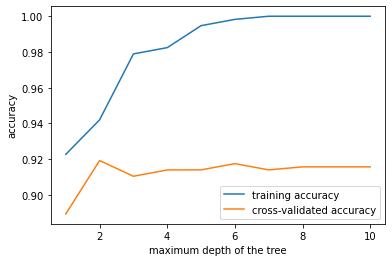

In [3]:
X = cancer.data
y = cancer.target

max_depth_range = range(1,11)
train_accuracy = []
cvalid_accuracy = []

for i in max_depth_range:
    dtc = tree.DecisionTreeClassifier(max_depth=i, random_state=101)
    dtc = dtc.fit(X,y)
    train_accuracy.append(dtc.score(X, y))
    cvalid_accuracy.append(np.mean(cross_val_score(dtc, X, y, cv=10)))
    
plt.plot(max_depth_range, train_accuracy)
plt.plot(max_depth_range, cvalid_accuracy)
plt.xlabel('maximum depth of the tree')
plt.ylabel('accuracy')
plt.legend(('training accuracy', 'cross-validated accuracy'))

(c) Now try the random forest classifier of the scikit-learn library and use the best
depth you get from (b) as max_depth. Vary the number of trees in the forest via the parameter
n_estimators and plot its 10-fold cross-validated accuracy (use n_estimators = $1, 2, \dots, 20$).
Again, use 101 as your random seed. Do you see an improvement using random forests versus
using a single tree? (Note: use the n_estimators=1 result as the result for a single tree.)

I see an improvement using random forests. With the value of n_estimators equal to 1, which means a single tree is used, the cross-validated accuracy is 0.919235588972431. However, the cross-validated accuracy increases to 0.9490914786967419, with the value n_estimators equal to 17, which means random forest is used.


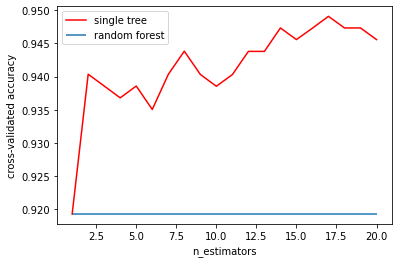

In [4]:
max_depth_chosen = np.argmax(cvalid_accuracy) + 1
n_estimators_range = range(1,21)
cvalid_accuracy_random = []
for i in n_estimators_range:
    rfc = ensemble.RandomForestClassifier(n_estimators = i, max_depth = max_depth_chosen, random_state=101)
    cvalid_accuracy_random.append(np.mean(cross_val_score(rfc, X, y, cv=10)))
plt.hlines(cvalid_accuracy_random[0], xmin = 1, xmax = 20)
plt.plot(n_estimators_range, cvalid_accuracy_random, color='r')
plt.legend(['single tree', 'random forest'])
plt.xlabel('n_estimators')
plt.ylabel('cross-validated accuracy')
print(f'I see an improvement using random forests. With the value of n_estimators equal to 1, which means a single tree is used, the cross-validated accuracy is {cvalid_accuracy_random[0]}. However, the cross-validated accuracy increases to {np.max(cvalid_accuracy_random)}, with the value n_estimators equal to {np.argmax(cvalid_accuracy_random) + 1}, which means random forest is used.')

(d) Using the method for building a decision tree you used in part (b), build a tree
but randomly hold out a $.2$,$.4$,$.6$, and $.8$ fraction of the data set (so you 
will need to build 4 different trees for each depth value). Use 101 as your random seed for both
the train-test split as well as the decision tree.
For each fraction held out, plot a curve of the test accuracy (the accuracy on the held-out
set) against depth. You should have four curves. Plot them all on the same plot and use
a legend to label them.

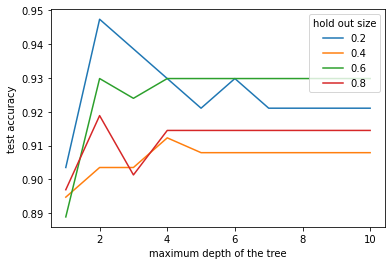

In [5]:
max_depth_range = range(1,11)
test_accuracy = []
hold_out_test_size = [0.2, 0.4, 0.6, 0.8]
for i in hold_out_test_size:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=101)
    for j in max_depth_range:
        dtc = tree.DecisionTreeClassifier(max_depth=j, random_state=101)
        dtc = dtc.fit(X_train, y_train)
        test_accuracy.append(dtc.score(X_test, y_test))
    plt.plot(max_depth_range, test_accuracy)
    test_accuracy = []
plt.xlabel('maximum depth of the tree')
plt.ylabel('test accuracy')
plt.legend(hold_out_test_size, title='hold out size')